# Ejercicio introducción a ciencia de datos

Se toma la base de la encuesta anual de desarrolladores de Stack Overflow, realizada en mas de 180 paises, la cual toma varios temas de interes general.

### Como objetivo de este notebook se plantea responder varias preguntas
##### 1. Cual es la distribución de los paises en total, ¿ cual es el que a tenido mas aumento en el 2020 ? 
##### 2. Analizar los items de nivel de educación y empleo, ¿ cual es el nivel de educacion que tiene el peor y cual el mejor porcentaje de empleo ?
##### 3. Analizar la tendencia de lenguajes de programación deseados

###### Para llevar a cabo el desarrollo de los objetivos se continua con su desarrollo:

Importacion de librerias, y carga de datos

##### 1. Cual es la distribución de los paises en total, ¿ cual es el que a tenido mas aumento en el 2020 ? 

In [255]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
os.chdir("C:\\Users\Kevin\Desktop\Proyecto 1\Data")
os.getcwd()


filename2013 = '2013 Stack Overflow Survey Responses.csv'
data_2013 = pd.read_csv(filename2013, header=0)
filename2014 = '2014 Stack Overflow Survey Responses.csv'
data_2014 = pd.read_csv(filename2014, header=0)
filename2015 = '2015 Stack Overflow Developer Survey Responses.csv'
data_2015 = pd.read_csv(filename2015, header=1)
filename2016 = '2016 Stack Overflow Survey Responses.csv'
data_2016 = pd.read_csv(filename2016, header=0)
filename2017 = 'survey_results_public_2017.csv'
data_2017 = pd.read_csv(filename2017, header=0)
filename2018 = 'survey_results_public_2018.csv'
data_2018 = pd.read_csv(filename2018, header=0)
filename2019 = 'survey_results_public_2019.csv'
data_2019 = pd.read_csv(filename2019, header=0)
filename2020 = 'survey_results_public_2020.csv'
data_2020 = pd.read_csv(filename2020, header=0)

C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (46,48,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Kevin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=

Se agrega una columna para identificar el año de la base

In [281]:
data_2020=data_2020.assign(año='2020')
data_2019=data_2019.assign(año='2019')
data_2018=data_2018.assign(año='2018')
data_2017=data_2017.assign(año='2017')
data_2016=data_2016.assign(año='2016')
data_2015=data_2015.assign(año='2015')
data_2014=data_2014.assign(año='2014')
data_2013=data_2013.assign(año='2013')

Antes de unir las bases, seleccionamos las variables y cambiamos nombres por practicidad

In [89]:
d_2020=data_2020[['Country','año']]
d_2019=data_2019[['Country','año']]
d_2018=data_2018[['Country','año']]
d_2017=data_2017[['Country','año']]
d_2016=data_2016[['country','año']]
d_2015=data_2015[['Country','año']]
d_2014=data_2014[['What Country do you live in?','año']]
d_2013=data_2013[['What Country or Region do you live in?','año']]

d_2020.columns =['Country','Año']
d_2019.columns =['Country','Año']
d_2018.columns =['Country','Año']
d_2017.columns =['Country','Año']
d_2016.columns =['Country','Año']
d_2015.columns =['Country','Año']
d_2014.columns =['Country','Año']
d_2013.columns =['Country','Año']

Unimos las columnas de las bases que nos interesa para resolver la primera pregunta

In [93]:
base_punto1=pd.concat([d_2020,d_2019,d_2018,d_2017,d_2016,d_2015,d_2014,d_2013])

Veamos una pequeña medida de la base que trabajaremos

In [100]:
base_punto1.describe()

          count unique            top   freq
Country  400851    282  United States  85594
Año      403094      8           2018  98855


Tambien es adecuado tener una idea grafica del estado de los datos

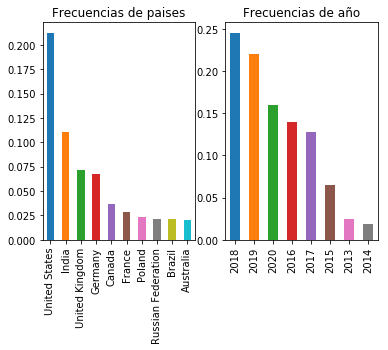

In [211]:
pais = base_punto1.Country.value_counts().head(10) 
año = base_punto1.Año.value_counts() 

plt.subplot(1,2,1)
p1=(pais/base_punto1.shape[0]).plot(kind="bar");
plt.title("Frecuencias de paises");

plt.subplot(1,2,2)
p2=(año/base_punto1.shape[0]).plot(kind="bar");
plt.title("Frecuencias de año");

Para observar que País obtuvo el mayor aumento en comparación al años anetior (2019), veamos:

In [138]:
pais_2020=base_punto1[base_punto1['Año']== '2020'].Country.value_counts()
pais_2019=base_punto1[base_punto1['Año']== '2019'].Country.value_counts()
aumento=(pais_2020/pais_2019)

In [218]:
aumento_2020=pd.concat([pais_2019,pais_2020, aumento], axis=1,sort=True) # unimos frecuencia de año 2019,2020 y aumento
aumento_2020.columns =['Año 2019','Año 2020','Aumento %']
aumento_2020.sort_values(by=['Aumento %'],ascending=False).head(10) # Top 10 de aumentos

,Año 2019,Año 2020,Aumento %
Niger,1.0,5.0,5.000000
Malawi,2.0,8.0,4.000000
Bhutan,2.0,7.0,3.500000
Brunei Darussalam,1.0,3.0,3.000000
Sierra Leone,2.0,6.0,3.000000
Saint Vincent and the Grenadines,1.0,3.0,3.000000
Rwanda,12.0,31.0,2.583333
Togo,4.0,10.0,2.500000
Lao People's Democratic Republic,3.0,7.0,2.333333
Republic of Korea,39.0,88.0,2.256410


###### Cierre de punto
Podemos entonces tener el top 10 de paises que han aumentado con respecto al 2019. Aunque una conclusión adicional es que los paises top en su mayoria son muy debiles en cuanto al desarrollo tecnologico, asi que su aceleración se ve mas alta por el efecto de datos muy pequeños.

##### 2. Analizar los items de nivel de educación y empleo, ¿ cual es el nivel de educacion que tiene el peor y cual el mejor porcentaje de empleo ?

Como en el punto anterior, primero seleccionamos y depuramos los campos que requerimos para la respuesta

In [238]:
d_2020=data_2020[['EdLevel','Employment']]
d_2019=data_2019[['EdLevel','Employment']]
d_2018=data_2018[['FormalEducation','Employment']]
d_2017=data_2017[['Professional','EmploymentStatus']]

#d_2016=data_2016[['country']] No se carga ya que no tiene los campos para homologar
#d_2015=data_2015[['Country']] No se carga ya que no tiene los campos para homologar
#d_2014=data_2014[['What Country do you live in?']] No se carga ya que no tiene los campos para homologar
#d_2013=data_2013[['What Country or Region do you live in?']] No se carga ya que no tiene los campos para homologar

d_2020.columns =['Nivel_educacion','Empleo']
d_2019.columns =['Nivel_educacion','Empleo']
d_2018.columns =['Nivel_educacion','Empleo']
d_2017.columns =['Nivel_educacion','Empleo']


Ahora podemos concatenar las bases para su analisis

In [239]:
base_punto2=pd.concat([d_2020,d_2019,d_2018,d_2017])

Primero es adecuado observar el estado de los campos a evaluar:

In [240]:
base_punto2.Nivel_educacion.value_counts().to_frame()

,Nivel_educacion
"Bachelor’s degree (BA, BS, B.Eng., etc.)",82793
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",40965
Professional developer,36131
Some college/university study without earning a degree,29451
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",26542
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",22364
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",13112
Student,8224
Associate degree,5908
Professional non-developer who sometimes writes code,5140


In [241]:
base_punto2.Empleo.value_counts().to_frame()

,Empleo
Employed full-time,216353
"Independent contractor, freelancer, or self-employed",28698
"Not employed, but looking for work",16534
Employed part-time,15246
"Not employed, and not looking for work",11048
Student,7787
I prefer not to say,1086
Retired,996


Con la tipologia de respuesta clara, se filtra la base 

In [242]:
base_punto2_filtrada=base_punto2[base_punto2.Empleo.isin(['Employed full-time','Not employed, but looking for work'])] 

In [257]:
# Tabla cruzada para frecuencias
tabla_cruzada=np.transpose(pd.crosstab(base_punto2_filtrada["Empleo"],base_punto2_filtrada["Nivel_educacion"]))

Ya contando con la tabla cruzada, veamos porcentajes top de las categorias de empleo

In [273]:
# Hacemos porcentaje de Empleado y tomamos el top 5
((tabla_cruzada[['Employed full-time']]/tabla_cruzada[['Employed full-time']].sum())*100).sort_values(by='Employed full-time',ascending=False).head(5)

Empleo,Employed full-time
Nivel_educacion,
"Bachelor’s degree (BA, BS, B.Eng., etc.)",31.906140
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",16.268193
Professional developer,14.402719
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9.876573
Some college/university study without earning a degree,8.734309


In [274]:
# Hacemos porcentaje de desempleado y tomamos el top 5
((tabla_cruzada[['Not employed, but looking for work']]/tabla_cruzada[['Not employed, but looking for work']].sum())*100).sort_values(by='Not employed, but looking for work',ascending=False).head(5)

Empleo,"Not employed, but looking for work"
Nivel_educacion,
"Bachelor’s degree (BA, BS, B.Eng., etc.)",25.661123
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",18.970242
Some college/university study without earning a degree,14.324858
Student,12.228382
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",7.117823


###### Cierre de punto
Se ve que el porcentaje mas alto en empleados y desempleados es el bachillerato, posible resultado por la cantidad de participantes de este segmento. Sin embargo, se denota que la participación de un master es alta en empleados, y cursos sin terminar o aun en estudios tienen el mayor porcentaje en desempleados.

##### 3. Analizar la tendencia de lenguajes de programación deseados

Realizamos el filtro de variables que necesitamos para la respuesta

In [286]:
d_2020=data_2020[['año','LanguageDesireNextYear']]
d_2019=data_2019[['año','LanguageDesireNextYear']]
d_2018=data_2018[['año','LanguageDesireNextYear']]
#d_2017=data_2017[[]] No se carga ya que no tiene los campos para homologar
#d_2016=data_2016[[]] No se carga ya que no tiene los campos para homologar
#d_2015=data_2015[[]] No se carga ya que no tiene los campos para homologar
#d_2014=data_2014[[]] No se carga ya que no tiene los campos para homologar
#d_2013=data_2013[[]] No se carga ya que no tiene los campos para homologar

#d_2020.columns =['Nivel_educacion','Empleo']
#d_2019.columns =['Nivel_educacion','Empleo']
#d_2018.columns =['Nivel_educacion','Empleo']
#d_2017.columns =['Nivel_educacion','Empleo']

Ahora concatenamos las bases a trabajar:

In [287]:
base_punto3=pd.concat([d_2020,d_2019,d_2018])

Tengamos una vista de la respuesta del campo

In [291]:
base_punto3.LanguageDesireNextYear.value_counts().head(8).to_frame()

,LanguageDesireNextYear
Python,3296
C#,1662
Java,1532
Go,1278
HTML/CSS;JavaScript;TypeScript,1147
HTML/CSS;JavaScript,1107
JavaScript,1099
Kotlin,1098


Como se observa en este top, es posible que el texto este concatenado con "punto y coma", es el deber poder separarlo y analizar bien la data

In [310]:
# Para tener resultados por año
lenguajes_2018=base_punto3[base_punto3.año.isin(['2018'])] 
lenguajes_2019=base_punto3[base_punto3.año.isin(['2019'])] 
lenguajes_2020=base_punto3[base_punto3.año.isin(['2020'])] 

In [344]:
le_2018=lenguajes_2018.LanguageDesireNextYear.str.split(';', expand=True)
le_2019=lenguajes_2019.LanguageDesireNextYear.str.split(';', expand=True)
le_2020=lenguajes_2020.LanguageDesireNextYear.str.split(';', expand=True)

# Concatenar todas las columnas 
lenguajes_2018_detallados=pd.concat([le_2018.iloc[:, 0],le_2018.iloc[:, 1],le_2018.iloc[:, 2],le_2018.iloc[:, 3],le_2018.iloc[:, 4],le_2018.iloc[:, 5],le_2018.iloc[:, 6],le_2018.iloc[:, 7],le_2018.iloc[:, 8],le_2018.iloc[:,9],le_2018.iloc[:,10],le_2018.iloc[:,11],le_2018.iloc[:, 12],le_2018.iloc[:,13],le_2018.iloc[:,14],le_2018.iloc[:, 15],le_2018.iloc[:, 16],le_2018.iloc[:, 17],le_2018.iloc[:, 18],le_2018.iloc[:,19],le_2018.iloc[:, 20],le_2018.iloc[:, 21],le_2018.iloc[:,22],le_2018.iloc[:, 23],le_2018.iloc[:, 24],le_2018.iloc[:, 25],le_2018.iloc[:, 26],le_2018.iloc[:, 27],le_2018.iloc[:, 28],le_2018.iloc[:, 29],le_2018.iloc[:, 30],le_2018.iloc[:,31],le_2018.iloc[:,32],le_2018.iloc[:,33],le_2018.iloc[:,34],le_2018.iloc[:,35],le_2018.iloc[:,36],le_2018.iloc[:,37]])
lenguajes_2019_detallados=pd.concat([le_2019.iloc[:, 0],le_2019.iloc[:, 1],le_2019.iloc[:, 2],le_2019.iloc[:, 3],le_2019.iloc[:, 4],le_2019.iloc[:, 5],le_2019.iloc[:, 6],le_2019.iloc[:, 7],le_2019.iloc[:, 8],le_2019.iloc[:, 9],le_2019.iloc[:,10],le_2019.iloc[:,11],le_2019.iloc[:,12],le_2019.iloc[:,13],le_2019.iloc[:,14],le_2019.iloc[:,15],le_2019.iloc[:,16],le_2019.iloc[:,17],le_2019.iloc[:,18],le_2019.iloc[:,19],le_2019.iloc[:,20],le_2019.iloc[:,21],le_2019.iloc[:,22],le_2019.iloc[:,23],le_2019.iloc[:,24],le_2019.iloc[:,25],le_2019.iloc[:,26],le_2019.iloc[:,27],le_2019.iloc[:,27]])
lenguajes_2020_detallados=pd.concat([le_2020.iloc[:, 0],le_2020.iloc[:,1],le_2020.iloc[:,2],le_2020.iloc[:,3],le_2020.iloc[:,4],le_2020.iloc[:,5],le_2020.iloc[:,6],le_2020.iloc[:,7],le_2020.iloc[:,8],le_2020.iloc[:,9],le_2020.iloc[:,10],le_2020.iloc[:,11],le_2020.iloc[:,12],le_2020.iloc[:,13],le_2020.iloc[:,14],le_2020.iloc[:,15],le_2020.iloc[:,16],le_2020.iloc[:,17],le_2020.iloc[:,18],le_2020.iloc[:,19],le_2020.iloc[:,20],le_2020.iloc[:,21],le_2020.iloc[:,22],le_2020.iloc[:,23],le_2020.iloc[:,24]])

Ya logramos separar y dejar lenguajes por unidad. Ahora veamos cuales fueron los lenguajes mas deseados por aprender en los ultimos 3 años

In [350]:
lenguajes_2018_detallados_año=lenguajes_2018_detallados.to_frame().assign(año='2018')
lenguajes_2019_detallados_año=lenguajes_2019_detallados.to_frame().assign(año='2019')
lenguajes_2020_detallados_año=lenguajes_2020_detallados.to_frame().assign(año='2020')

In [354]:
# Concatenar los 3 años con la infromación de forma correcta
lenguajes_3años= pd.concat([lenguajes_2018_detallados_año.iloc[:,0],lenguajes_2019_detallados_año.iloc[:,0],lenguajes_2020_detallados_año.iloc[:,0]])

In [372]:
lenguajes_3años_frecuancia=lenguajes_3años.value_counts().to_frame()
lenguajes_3años_frecuancia.columns=['Frecuencia']
lenguajes_3años_frecuancia.head(10)

,Frecuencia
JavaScript,109392
Python,99483
SQL,81547
Java,59328
TypeScript,57766
HTML/CSS,57416
C#,56542
Go,45194
C++,41901
Kotlin,34828


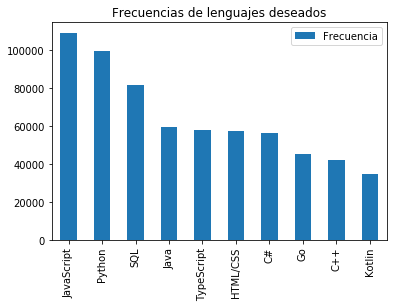

In [371]:
Lengua = lenguajes_3años_frecuancia.head(10) 

p1=Lengua.plot(kind="bar");
plt.title("Frecuencias de lenguajes deseados");

###### Cierre de punto
Fue de gran importancia lograr separar las respuestas para su correcto analisis. Con esto, podemos ver que JavaScript y python estan liderando los lenguajes con deseo de aprendizaje.